# DECISION TREE

### Important Considerations


| PROS |  CONS  |
| ---- | -----  |
| Easy to visualize and Interpret |  Prone to overfitting |
| No normalization of Data Necessary |  Ensemble needed for better performance |
| Handles mixed feature types    |    |


### Iris Example


**Use measurements to predict species**


![](images/iris.png)
Iris Example
Use measurements to predict species

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
#split the data
X = iris.drop('species',axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=667
                                                    )

In [ ]:
len(X_test)

38

In [4]:
from sklearn.tree import DecisionTreeClassifier

#load classifier
model = DecisionTreeClassifier()

In [5]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
#examine score -->Accuracy
model.score(X_train, y_train)

1.0

In [7]:
#against test set
model.score(X_test, y_test)

0.9210526315789473

### How would specific flower be classified?

If we have a flower that has:

- Sepal.Length = 1.0
- Sepal.Width = 0.3
- Petal.Length = 1.4
- Petal.Width = 2.1

In [ ]:
model.predict_proba([[1.0, 0.3, 1.4, 2.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [ ]:
res = model.predict([[1.0, 0.3, 1.4, 2.1]])
res[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'setosa'

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=10)

array([0.83333333, 1.        , 1.        , 0.90909091, 1.        ,
       0.90909091, 0.81818182, 1.        , 1.        , 1.        ])

### How important are different features?

1.   List item
2.   List item

In [8]:
#list of feature importance
model.feature_importances_

array([0.01786711, 0.        , 0.54879489, 0.433338  ])

In [9]:
importance = model.feature_importances_

<BarContainer object of 4 artists>

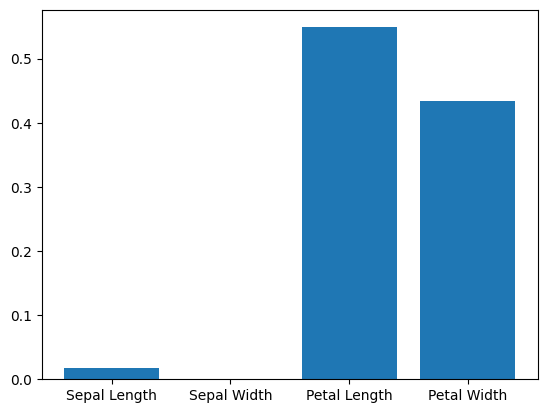

In [10]:
plt.bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], importance)

### Visualizing Decision Tree

In [ ]:
#https://graphviz.org/download/
## download add to path for windows

In [ ]:
#!pip install graphviz -q

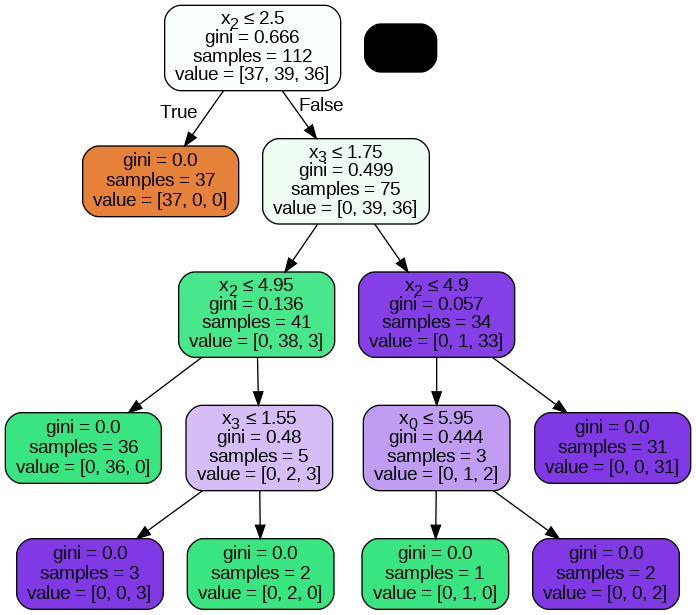

In [11]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### What's Happening with Decision Tree

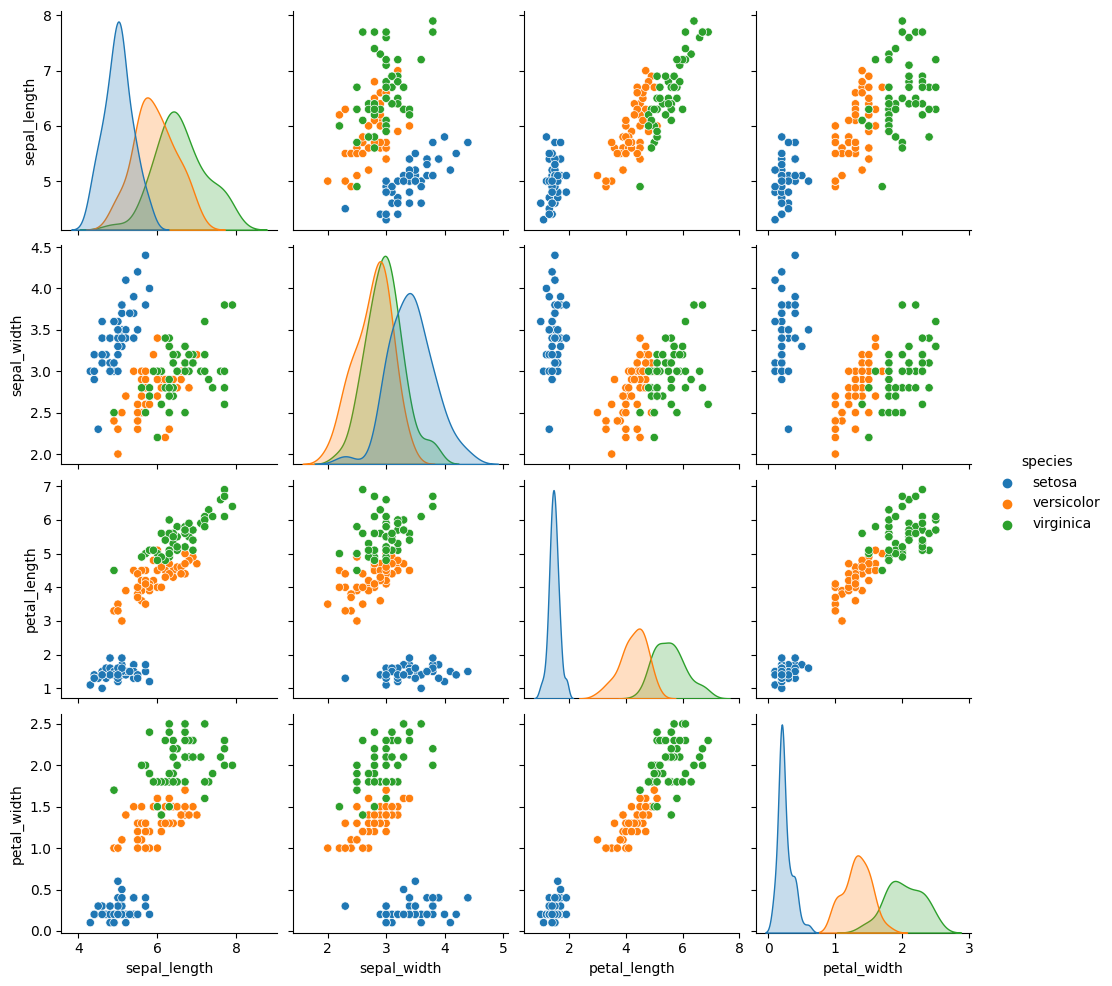

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.pairplot(data = iris, hue = 'species');

### Pre-pruning: Avoiding Over-fitting

- `max_depth`: limits depth of tree

- `max_leaf_nodes`: limits how many leafs

- `min_samples_leaf`: limits splits to happen when only certain number of samples exist

In [12]:
model = DecisionTreeClassifier(max_depth = 1).fit(X_train, y_train)

In [13]:
model.score(X_train, y_train)

0.6785714285714286

In [14]:
model.score(X_test, y_test)

0.631578947368421

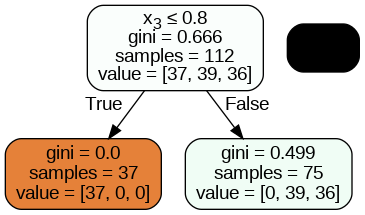

In [15]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [16]:
#aumento complessità - 2 livello
model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

In [17]:
model.score(X_train, y_train)

0.9642857142857143

In [18]:
model.score(X_test, y_test)

0.9473684210526315

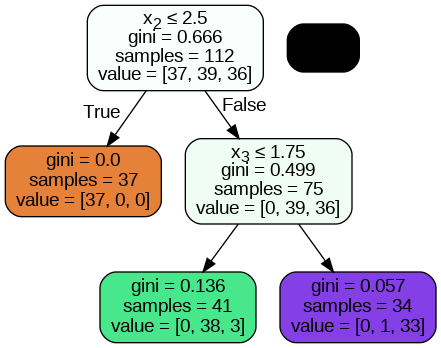

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
model = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
model.score(X_train, y_train)

0.9732142857142857

In [20]:
model.score(X_test, y_test)

0.9736842105263158

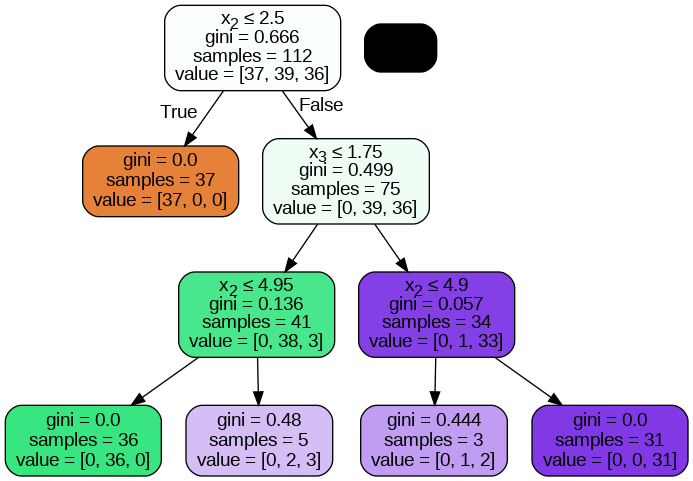

In [21]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Confusion Matrix

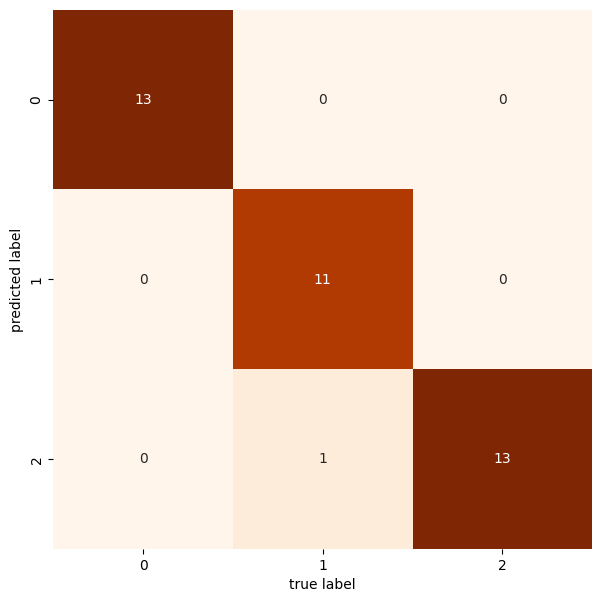

In [22]:
from sklearn.metrics import confusion_matrix

predictions=model.predict(X_test)
mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(12,7))
sns.heatmap(mat, square=True, annot=True, cbar=False,cmap='Oranges')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [23]:
import sklearn
sklearn.metrics.confusion_matrix(y_test, predictions)

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 13]])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9736842105263158

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

